In [35]:
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import pandas as pd

%matplotlib inline
seed = 0
np.random.seed(seed)
import tensorflow as tf

tf.random.set_seed(seed)
import os

In [4]:
import tf2onnx
print(tf2onnx.__version__)



1.16.1


In [36]:
print("Tensorflow version:", tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

Tensorflow version: 2.18.0
Num GPUs Available:  0


In [37]:
df = pd.read_pickle("data.pkl")
df["isconv"] = df["isconv"].apply(lambda x: "Yes" if x == 1 else "No")
df["convep_inECAL"] = df.apply(lambda row: "Yes" if row["conve_inECAL"]==1 and row["convp_inECAL"] == 1 else "No", axis=1)
X = df.drop(columns=["isconv","conve_inECAL","convp_inECAL","convep_inECAL","reco_ratio","init_E"])
y = df["init_E"]

In [38]:
print(df.head)
print(type(X))
print(type(y))
print(X.shape, y.shape)
print(X.head)
print(y.head)

<bound method NDFrame.head of         t_0_0  t_0_1  t_0_2  t_0_3  t_0_4  t_0_5  t_0_6  t_0_7  t_0_8  t_0_9  \
0           0      0      0      0      0      0      0      0      0      0   
1           0      0      0      0      0      0      0      0      0      0   
2           0      0      0      0      0      0      0      0      0      0   
3           0      0      0      0      0      0      0      0      0      0   
4           0      0      0      0      0      0      0      0      0      0   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
119995      0      0      0      0      0      0      0      0      0      0   
119996      0      0      0      0      0      0      0      0      0      0   
119997      0      0      0      0      0      0      0      0      0      0   
119998      0      0      0      0      0      0      0      0      0      0   
119999      0      0      0      0      0      0      0      0      0      0   

        .

In [39]:
# le = LabelEncoder()
# y = le.fit_transform(y)
# y = to_categorical(y, 2)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(y[:5])

0    1000.0
1    1000.0
2    1000.0
3    1000.0
4    1000.0
Name: init_E, dtype: float64


In [40]:
scaler = StandardScaler()
X_train_val = scaler.fit_transform(X_train_val)
X_test = scaler.transform(X_test)

In [41]:
np.save('X_train_val.npy', X_train_val)
np.save('X_test.npy', X_test)
np.save('y_train_val.npy', y_train_val)
np.save('y_test.npy', y_test)
# np.save('classes.npy', le.classes_)

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1
from callbacks import all_callbacks
from keras import regularizers

In [ ]:
#Used for classification problems
# model = Sequential()
# model.add(Dense(64, input_shape=(101,), name='fc1', kernel_initializer='lecun_uniform', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
#     bias_regularizer=regularizers.L2(1e-4),
#     activity_regularizer=regularizers.L2(1e-5)))
# model.add(Activation(activation='relu', name='relu1'))
# model.add(Dense(32, name='fc2', kernel_initializer='lecun_uniform', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
#     bias_regularizer=regularizers.L2(1e-4),
#     activity_regularizer=regularizers.L2(1e-5)))
# model.add(Activation(activation='relu', name='relu2'))
# model.add(Dense(32, name='fc3', kernel_initializer='lecun_uniform', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
#     bias_regularizer=regularizers.L2(1e-4),
#     activity_regularizer=regularizers.L2(1e-5)))
# model.add(Activation(activation='relu', name='relu3'))
# model.add(Dense(2, name='output', kernel_initializer='lecun_uniform', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
#     bias_regularizer=regularizers.L2(1e-4),
#     activity_regularizer=regularizers.L2(1e-5)))
# model.add(Activation(activation='softmax', name='softmax'))

In [43]:
#Used for regression problems
# 创建模型
model = Sequential()
# 第一层
model.add(Dense(64, input_shape=(326,), name='fc1', kernel_initializer='lecun_uniform',
                kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                bias_regularizer=regularizers.L2(1e-4),
                activity_regularizer=regularizers.L2(1e-5)))
model.add(Activation(activation='relu', name='relu1'))
# 第二层
model.add(Dense(32, name='fc2', kernel_initializer='lecun_uniform',
                kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                bias_regularizer=regularizers.L2(1e-4),
                activity_regularizer=regularizers.L2(1e-5)))
model.add(Activation(activation='relu', name='relu2'))
# 第三层
model.add(Dense(32, name='fc3', kernel_initializer='lecun_uniform',
                kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                bias_regularizer=regularizers.L2(1e-4),
                activity_regularizer=regularizers.L2(1e-5)))
model.add(Activation(activation='relu', name='relu3'))
# 输出层（线性激活，用于回归任务）
model.add(Dense(1, name='output', kernel_initializer='lecun_uniform',
                kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                bias_regularizer=regularizers.L2(1e-4),
                activity_regularizer=regularizers.L2(1e-5)))
model.add(Activation(activation='linear', name='linear'))
# 编译模型
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

D:\Ana\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# train = True
# if train:
#     adam = Adam(learning_rate=0.01)
#     model.compile(optimizer=adam, loss=['categorical_crossentropy'], metrics=['accuracy'])
#     callbacks = all_callbacks(
#         stop_patience=1000,
#         lr_factor=0.5,
#         lr_patience=10,
#         lr_epsilon=0.000001,
#         lr_cooldown=2,
#         lr_minimum=0.0000001,
#         outputDir='model_1',
#     )
#     model.fit(
#         X_train_val,
#         y_train_val,
#         batch_size=1024,
#         epochs=10,
#         validation_split=0.25,
#         shuffle=True,
#         callbacks=callbacks.callbacks,
#         verbose=1,
#     )
# else:
#     from tensorflow.keras.models import load_model
#     model = load_model('model_1/KERAS_check_best_model.keras')


In [52]:
#For regression problem
train = True
if train:
    adam = Adam(learning_rate=0.02)
    model.compile(optimizer=adam, loss=['mean_squared_error'], metrics=['mae'])
    callbacks = all_callbacks(
        stop_patience=1000,
        lr_factor=0.5,
        lr_patience=10,
        lr_epsilon=0.000001,
        lr_cooldown=2,
        lr_minimum=0.0000001,
        outputDir='model_1',
    )
    model.fit(
        X_train_val,
        y_train_val,
        batch_size=1024,
        epochs=50,
        validation_split=0.25,
        shuffle=True,
        callbacks=callbacks.callbacks,
        verbose=1,
    )
else:
    from tensorflow.keras.models import load_model
    model = load_model('model_1/KERAS_check_best_model.keras')


Epoch 1/50
68/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 110708.8750 - mae: 125.7214
***callbacks***
saving losses to model_1\losses.log

***callbacks end***

71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 110236.8359 - mae: 124.9974 - val_loss: 124809.7422 - val_mae: 116.3991 - learning_rate: 0.0200
Epoch 2/50
62/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 97464.2500 - mae: 104.7921
***callbacks***
saving losses to model_1\losses.log

***callbacks end***

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 97309.1172 - mae: 104.6315 - val_loss: 124740.9141 - val_mae: 116.4295 - learning_rate: 0.0200
Epoch 3/50
61/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 95487.3984 - mae: 101.7111
***callbacks***
saving losses to model_1\losses.log

***callbacks end***

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 95471.5625 - mae: 101.6886 - val_loss: 125743.0938 - val_mae: 120.2529 - learning_rate: 0.0200
Epoch 4/50
60/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 96594.3672 - mae: 103.3746
***callba

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 98100.3047 - mae: 106.6615
***callbacks***
saving losses to model_1\losses.log

***callbacks end***

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 98077.5156 - mae: 106.6394 - val_loss: 124041.9922 - val_mae: 121.6349 - learning_rate: 0.0200
Epoch 24/50
61/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 96193.0234 - mae: 104.8562
***callbacks***
saving losses to model_1\losses.log

***callbacks end***

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 95874.4531 - mae: 104.3871 - val_loss: 121556.2734 - val_mae: 116.2480 - learning_rate: 0.0200
Epoch 25/50
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 94527.9531 - mae: 102.0791
***callbacks***
saving losses to model_1\losses.log

***callbacks end***

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 94504.2812 - mae: 102.0441 - val_loss: 126884.7031 - val_mae: 127.6720 - learning_rate: 0.0200
Epoch 26/50
67/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 94633.7969 - mae: 103.3808
***callbacks***
savi

60/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 94005.2734 - mae: 93.4808
***callbacks***
saving losses to model_1\losses.log

***callbacks end***

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 93411.1953 - mae: 93.3517 - val_loss: 120144.0781 - val_mae: 121.0690 - learning_rate: 0.0100
Epoch 46/50
60/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 87604.2891 - mae: 92.3270
***callbacks***
saving losses to model_1\losses.log

***callbacks end***

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 87475.5859 - mae: 92.0737 - val_loss: 118697.5156 - val_mae: 119.8252 - learning_rate: 0.0100
Epoch 47/50
59/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 87217.0234 - mae: 90.6249
***callbacks***
saving losses to model_1\losses.log

***callbacks end***

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 87033.9141 - mae: 90.3230 - val_loss: 117637.1484 - val_mae: 113.7124 - learning_rate: 0.0050
Epoch 48/50
67/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 85883.7266 - mae: 88.3876
***callbacks***
saving loss

In [ ]:
# import plotting
# import matplotlib.pyplot as plt
# from sklearn.metrics import accuracy_score

# y_keras = model.predict(X_test)
# # print("Accuracy: {}".format(accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_keras, axis=0))))
# plt.figure(figsize=(9, 9))
# _ = plotting.makeRoc(y_test, y_keras)

750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


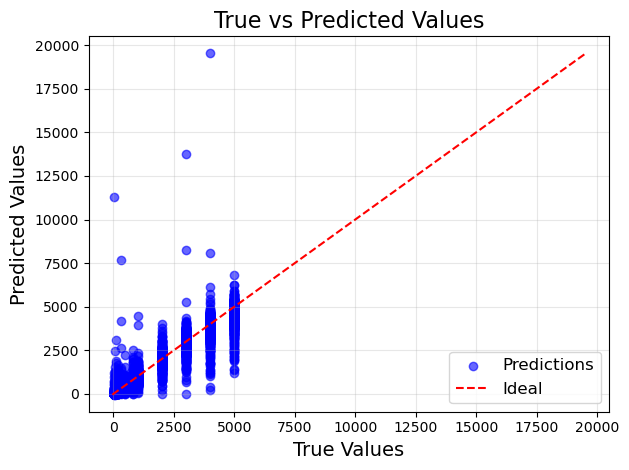

In [49]:
import matplotlib.pyplot as plt
y_keras = model.predict(X_test)
plt.scatter(y_test, y_keras, alpha=0.6, label='Predictions', color='blue')
max_value = max(y_test.max(), y_keras.max())
min_value = min(y_test.min(), y_keras.min())
plt.plot([min_value, max_value], [min_value, max_value], '--', color='red', label='Ideal')

# 添加标签和标题
plt.xlabel("True Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.title("True vs Predicted Values", fontsize=16)

# 添加图例
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# 显示图表
plt.tight_layout()
plt.show()

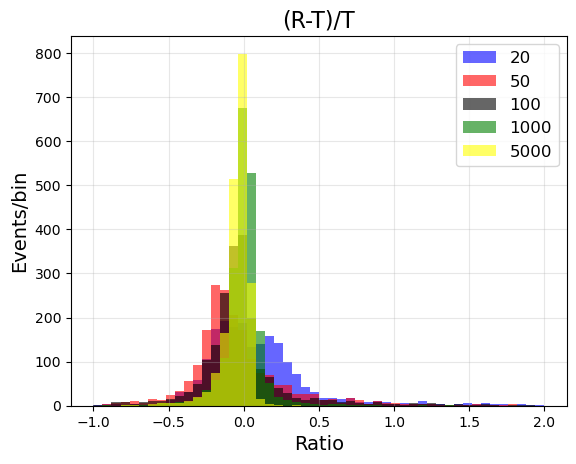

In [50]:
y_test = np.array(y_test)
y_keras = np.array(y_keras)
# 如果 y_keras 是二维数组，使用 np.squeeze 将其变为一维
if len(y_keras.shape) > 1 and y_keras.shape[1] == 1:
    y_keras = np.squeeze(y_keras)

# 确保 y_test 和 y_keras 的大小一致
if y_keras.shape != y_test.shape:
    raise ValueError(f"Shape mismatch: y_keras.shape={y_keras.shape}, y_test.shape={y_test.shape}")

# 计算相对误差
r20=[]
r50=[]
r100=[]
r1000=[]
r5000=[]
for i in range(len(y_test)):
    iE = y_test[i]
    r = (y_keras[i]-y_test[i])/y_test[i]
    if(iE==20):
        r20.append(r)
    elif(iE==50):
        r50.append(r)
    elif(iE==100):
        r100.append(r)
    elif(iE==1000):
        r1000.append(r)
    elif(iE==5000):
        r5000.append(r)
    else:
        pass
ratio = (y_keras - y_test) / y_test
histrange=(-1.0,2.0)
# plt.hist(ratio, bins=50, color='blue', alpha=0.7, edgecolor='black', range=(-2,2))
plt.hist(r20, bins=50, range=histrange, alpha=0.6, label='20', color='blue')
plt.hist(r50, bins=50, range=histrange, alpha=0.6, label='50', color='red')
plt.hist(r100, bins=50, range=histrange, alpha=0.6, label='100', color='black')
plt.hist(r1000, bins=50, range=histrange, alpha=0.6, label='1000', color='green')
plt.hist(r5000, bins=50, range=histrange, alpha=0.6, label='5000', color='yellow')

# 添加标题和标签
plt.title("(R-T)/T", fontsize=16)
plt.xlabel("Ratio", fontsize=14)
plt.ylabel("Events/bin", fontsize=14)

# 添加图例
plt.legend(fontsize=12)

# 显示网格
plt.grid(alpha=0.3)